
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the Dow Jones Industrial Average.  Construct portfolios from the 30 stocks in the DJIA and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,43.26,73.71,31.04,4.19,7.28,16.66,10.17,22.06,4.19,0.19
1,AXP,American Express,US Stocks:Financials,90.24,59.22,57.24,20.21,21.88,17.71,10.55,30.31,20.21,0.67
2,AMGN,Amgen,US Stocks:Healthcare,-41.32,20.33,10.26,11.63,11.27,16.15,11.12,24.36,11.63,0.48
3,AAPL,Apple Inc.,US Stocks:Technology,-17.18,16.35,57.28,39.50,40.71,22.00,12.70,33.48,39.50,1.18
4,BA,Boeing,US Stocks:Industrials,198.04,57.13,35.60,-10.38,16.64,30.74,15.13,50.68,-10.38,-526.06
5,CAT,Caterpillar Inc.,US Stocks:Industrials,35.77,53.67,93.70,20.12,30.63,15.92,9.51,26.97,20.12,0.75
6,CVX,Chevron Corporation,US Stocks:Energy,9.38,2.88,19.02,0.69,6.06,25.35,16.03,33.48,0.69,0.02
7,CSCO,Cisco Systems,US Stocks:Technology,95.60,92.22,19.17,10.78,16.87,16.53,8.79,27.21,10.78,0.40
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,62.86,55.41,21.32,12.58,8.19,8.79,4.34,18.96,12.58,0.66
9,DOW,Dow Inc.,US Stocks:Materials,68.22,63.02,73.02,73.02,73.02,22.18,10.47,39.10,73.02,1.87


In [6]:
# add fundamental columns
df = bb.add_fundamental_columns(df)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio,Previous Close,Trailing PE,Dividend Yield,Market Cap
0,MMM,3M,US Stocks:Industrials,43.26,73.71,31.04,4.19,7.28,16.66,10.17,22.06,4.19,0.19,203.67,21.09,2.97,119442.04
1,AXP,American Express,US Stocks:Financials,90.24,59.22,57.24,20.21,21.88,17.71,10.55,30.31,20.21,0.67,164.52,27.04,1.11,132544.99
2,AMGN,Amgen,US Stocks:Healthcare,-41.32,20.33,10.26,11.63,11.27,16.15,11.12,24.36,11.63,0.48,235.74,19.62,2.85,136083.11
3,AAPL,Apple Inc.,US Stocks:Technology,-17.18,16.35,57.28,39.50,40.71,22.00,12.70,33.48,39.50,1.18,123.54,28.30,0.69,2100801.96
4,BA,Boeing,US Stocks:Industrials,198.04,57.13,35.60,-10.38,16.64,30.74,15.13,50.68,-10.38,-526.06,250.32,0.00,0.00,146155.72
5,CAT,Caterpillar Inc.,US Stocks:Industrials,35.77,53.67,93.70,20.12,30.63,15.92,9.51,26.97,20.12,0.75,243.84,39.02,1.77,133670.99
6,CVX,Chevron Corporation,US Stocks:Energy,9.38,2.88,19.02,0.69,6.06,25.35,16.03,33.48,0.69,0.02,107.59,0.00,4.94,209098.10
7,CSCO,Cisco Systems,US Stocks:Technology,95.60,92.22,19.17,10.78,16.87,16.53,8.79,27.21,10.78,0.40,53.33,22.62,2.92,228272.18
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,62.86,55.41,21.32,12.58,8.19,8.79,4.34,18.96,12.58,0.66,55.64,33.68,3.07,242488.89
9,DOW,Dow Inc.,US Stocks:Materials,68.22,63.02,73.02,73.02,73.02,22.18,10.47,39.10,73.02,1.87,70.61,26.58,4.23,52565.62


In [7]:
# rank
rank = bb.rank(df, rank_by='Dividend Yield')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio,Previous Close,Trailing PE,Dividend Yield,Market Cap
6,CVX,Chevron Corporation,US Stocks:Energy,9.38,2.88,19.02,0.69,6.06,25.35,16.03,33.48,0.69,0.02,107.59,0.00,4.94,209098.10
13,IBM,IBM,US Stocks:Technology,36.86,116.93,20.46,6.04,3.70,14.31,8.61,28.47,6.04,0.21,145.55,24.66,4.58,131723.16
25,VZ,Verizon Communications,US Stocks:Communication Services,-25.00,14.40,4.55,10.85,7.07,11.79,8.12,14.47,10.85,0.75,56.98,12.56,4.28,237226.00
9,DOW,Dow Inc.,US Stocks:Materials,68.22,63.02,73.02,73.02,73.02,22.18,10.47,39.10,73.02,1.87,70.61,26.58,4.23,52565.62
18,MRK,Merck & Co.,US Stocks:Healthcare,-0.50,31.75,-1.69,11.01,9.70,16.27,8.90,17.21,11.01,0.64,73.91,26.76,3.42,187594.65
27,WBA,Walgreens Boots Alliance,US Stocks:Consumer Discretionary,20.48,88.73,29.33,-1.30,-4.33,23.76,16.04,31.53,-1.30,-40.99,54.77,0.00,3.41,47412.01
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,62.86,55.41,21.32,12.58,8.19,8.79,4.34,18.96,12.58,0.66,55.64,33.68,3.07,242488.89
0,MMM,3M,US Stocks:Industrials,43.26,73.71,31.04,4.19,7.28,16.66,10.17,22.06,4.19,0.19,203.67,21.09,2.97,119442.04
7,CSCO,Cisco Systems,US Stocks:Technology,95.60,92.22,19.17,10.78,16.87,16.53,8.79,27.21,10.78,0.40,53.33,22.62,2.92,228272.18
2,AMGN,Amgen,US Stocks:Healthcare,-41.32,20.33,10.26,11.63,11.27,16.15,11.12,24.36,11.63,0.48,235.74,19.62,2.85,136083.11


### Sample Portfolios
Format 'Investment option': weight

In [8]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [9]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [10]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [11]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [12]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Annual Returns'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [13]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,CVX,IBM,VZ,DOW,MRK,WBA,KO,MMM,CSCO,AMGN,...,JNJ,INTC,JPM,TRV,MCD,HD,CAT,HON,WMT,Ranked Portfolio
Annual Returns,0.69,6.04,10.85,73.02,11.01,-1.30,12.58,4.19,10.78,11.63,...,13.82,2.81,18.93,9.90,16.13,20.46,20.12,19.38,20.65,18.35
Std Dev,33.48,28.47,14.47,39.10,17.21,31.53,18.96,22.06,27.21,24.36,...,18.83,27.58,27.73,20.12,18.68,24.47,26.97,24.80,15.59,19.47
Sharpe Ratio,0.02,0.21,0.75,1.87,0.64,-40.99,0.66,0.19,0.40,0.48,...,0.73,0.10,0.68,0.49,0.86,0.84,0.75,0.78,1.32,0.94
Weight,0.02,0.05,0.22,0.10,0.03,0.04,0.03,0.03,0.05,0.03,...,0.03,0.05,0.05,0.05,0.03,0.04,0.03,0.03,0.04,1.00
Worst Typical Down Year,-66.27,-50.90,-18.09,-5.18,-23.41,-64.36,-25.34,-39.93,-43.64,-37.09,...,-23.84,-52.35,-36.53,-30.34,-21.23,-28.48,-33.82,-30.22,-10.53,-20.58
Black Swan,-99.75,-79.37,-32.56,-44.28,-40.62,-95.89,-44.30,-61.99,-70.85,-61.45,...,-42.67,-79.93,-64.26,-50.46,-39.91,-52.95,-60.79,-55.02,-26.12,-40.04


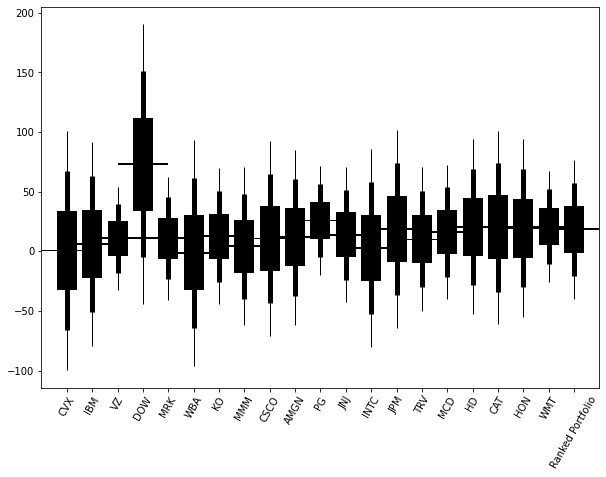

In [14]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

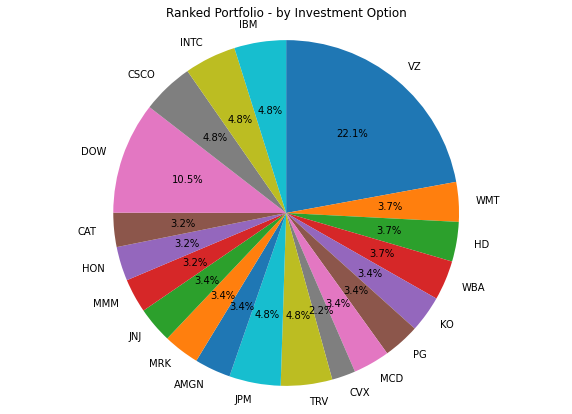

VZ     0.22
WMT    0.04
HD     0.04
WBA    0.04
KO     0.03
PG     0.03
MCD    0.03
CVX    0.02
TRV    0.05
JPM    0.05
AMGN   0.03
MRK    0.03
JNJ    0.03
MMM    0.03
HON    0.03
CAT    0.03
DOW    0.10
CSCO   0.05
INTC   0.05
IBM    0.05



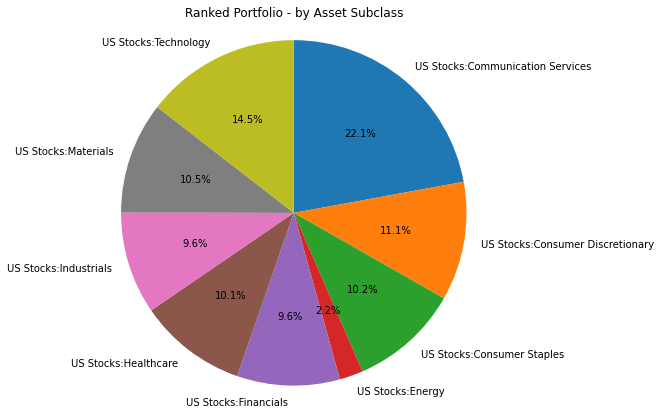

US Stocks:Communication Services   0.22
US Stocks:Consumer Discretionary   0.11
US Stocks:Consumer Staples         0.10
US Stocks:Energy                   0.02
US Stocks:Financials               0.10
US Stocks:Healthcare               0.10
US Stocks:Industrials              0.10
US Stocks:Materials                0.10
US Stocks:Technology               0.15



In [15]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [16]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    CVX                            0.0221
    IBM                            0.0484
    VZ                             0.2212
    DOW                            0.1046
    MRK                            0.0338
    WBA                            0.0371
    KO                             0.0342
    MMM                            0.0319
    CSCO                           0.0484
    AMGN                           0.0338
    PG                             0.0342
    JNJ                            0.0338
    INTC                           0.0484
    JPM                            0.0481
    TRV                            0.0481
    MCD                            0.0342
    HD                             0.0371
    CAT                            0.0319
    HON                            0.0319
    WMT                            0.0371


### Optimize Portfolio

In [17]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [18]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer..........

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.18
    annual_return              23.17
    std_dev                    19.70
    worst typical down year   -16.23
    black_swan                -35.93


Ranked Portfolio Weights:
    CVX                            0.0500
    IBM                            0.0000
    VZ                             0.0600
    DOW                            0.1100
    MRK                            0.0000
    WBA                            0.0000
    KO                             0.0400
    MMM                            0.0000
    CSCO                           0.0500
    AMGN                           0.0500
    PG                             0.1100
    JNJ                            0.0400
    INTC                           0.0000
    JPM                            0.0700
    TRV                            0.0000
    MCD                            0.0900
    HD                             0.1200
    CAT

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).